# **Ejemplo Basico con Garch & Arch**

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import yfinance as yf
from arch import arch_model
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Obtener datos de Facebook desde Yahoo Finance
fb = yf.Ticker("META")
data = fb.history(period="max")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,41.963770,44.907721,37.922076,38.151604,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.455086,36.584820,32.932326,33.960213,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.543127,33.521117,30.876552,30.936428,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.305670,32.433352,31.295691,31.934378,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.882431,33.141896,31.704851,32.962265,50237200,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-12 00:00:00-04:00,516.859985,518.020020,509.100006,515.950012,9767400,0.0,0.0
2024-08-13 00:00:00-04:00,520.010010,531.500000,518.150024,528.539978,13743800,0.0,0.0
2024-08-14 00:00:00-04:00,528.059998,534.000000,523.130005,526.760010,11444200,0.0,0.0


In [75]:
data['return']=data['Close'].pct_change()
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return
Date,,,,,,,,
2012-05-21 00:00:00-04:00,36.455086,36.584820,32.932326,33.960213,168192700,0.0,0.0,-0.109861
2012-05-22 00:00:00-04:00,32.543127,33.521117,30.876552,30.936428,101786600,0.0,0.0,-0.089039
2012-05-23 00:00:00-04:00,31.305670,32.433352,31.295691,31.934378,73600000,0.0,0.0,0.032258
2012-05-24 00:00:00-04:00,32.882431,33.141896,31.704851,32.962265,50237200,0.0,0.0,0.032187
2012-05-25 00:00:00-04:00,32.832534,32.882431,31.046204,31.844563,37149800,0.0,0.0,-0.033909


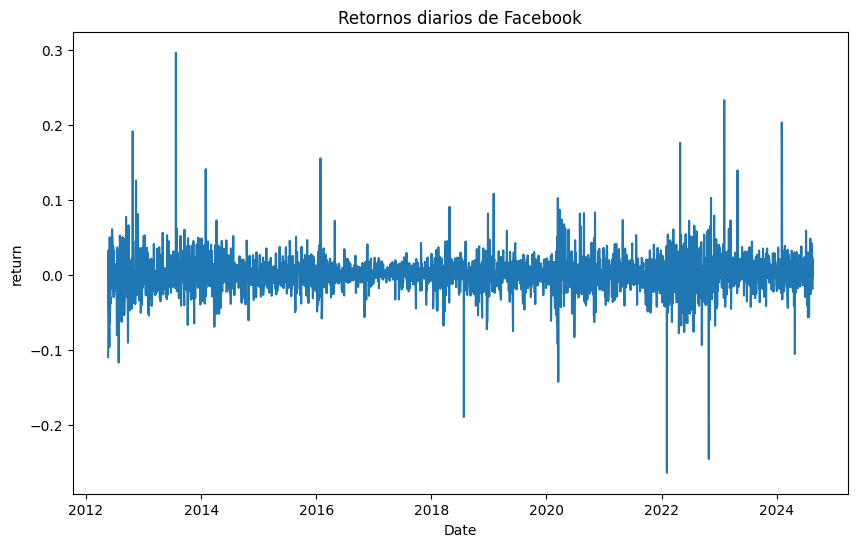

In [76]:
# Plotear serie de tiempo de retornos
plt.figure(figsize=(10, 6))
sns.lineplot(data=data,x=data.index,y=data['return'])
plt.title('Retornos diarios de Facebook')
plt.show()

## **Modelo Arch**

In [77]:
# Modelo ARCH
arch_model_instance = arch_model(data['return']*100, vol='ARCH', p=1)
arch_fit = arch_model_instance.fit(disp='off')
print(arch_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7174.22
Distribution:                  Normal   AIC:                           14354.4
Method:            Maximum Likelihood   BIC:                           14372.5
                                        No. Observations:                 3080
Date:                Sat, Aug 17 2024   Df Residuals:                     3079
Time:                        11:35:29   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1110  4.861e-02      2.284  2.240e-02 [1.573e-0

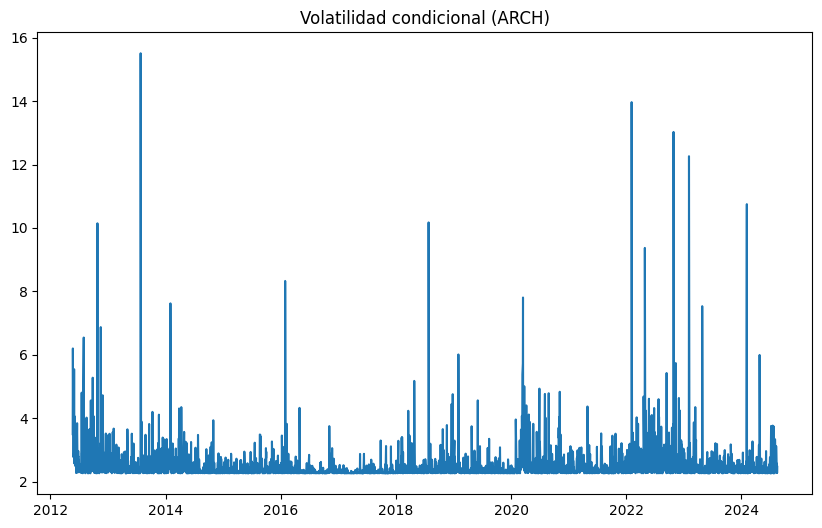

In [78]:
# Plotear volatilidad condicional
plt.figure(figsize=(10, 6))
plt.plot(arch_fit.conditional_volatility)
plt.title('Volatilidad condicional (ARCH)')
plt.show()

## **Modelo Garch**

1. P : (el orden de la parte autorregresiva de la volatilidad)
2. q :  (el orden de la parte media móvil de la volatilidad)

In [79]:
# Modelo GARCH
garch_model_instance = arch_model(data['return']*100, vol='GARCH', p=1, q=1)
garch_fit = garch_model_instance.fit(disp='off')
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7036.52
Distribution:                  Normal   AIC:                           14081.0
Method:            Maximum Likelihood   BIC:                           14105.2
                                        No. Observations:                 3080
Date:                Sat, Aug 17 2024   Df Residuals:                     3079
Time:                        11:35:30   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1293  3.838e-02      3.369  7.535e-04 [5.409e-0

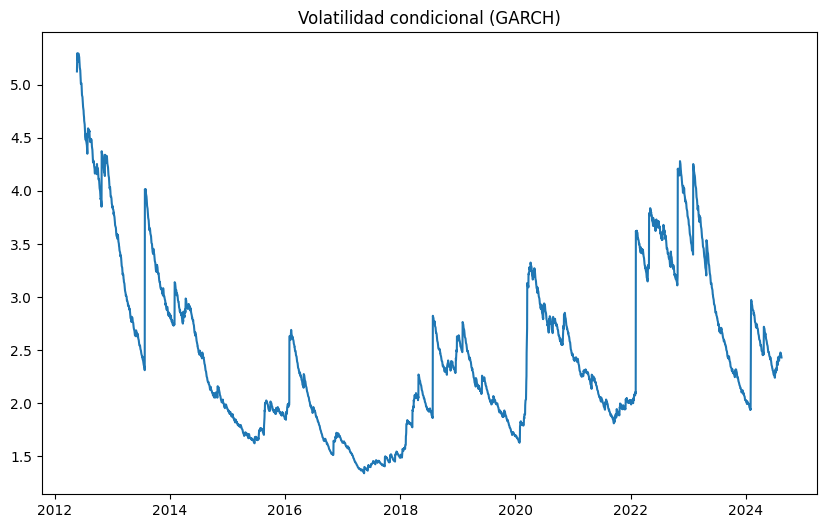

In [80]:
# Plotear volatilidad condicional
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility)
plt.title('Volatilidad condicional (GARCH)')
plt.show()

**Garh con Hiperparametros**

In [81]:
p_values=range(1,6)
q_values=range(1,6)
best_aic = np.inf
best_bic = np.inf
best_params_aic = None
best_params_bic = None
for p in p_values:
    for q in q_values:
        try:
            model = arch_model(data['return']*100, vol='GARCH', p=p, q=q)
            model_fit = model.fit(disp='off')
            aic = model_fit.aic
            bic = model_fit.bic

            if aic < best_aic:
                best_aic = aic
                best_params_aic = (p, q)

            if bic < best_bic:
                best_bic = bic
                best_params_bic = (p, q)

        except Exception as e:
            print(f"Error con p={p}, q={q}: {e}")

print(f"Mejores parámetros para AIC: p={best_params_aic[0]}, q={best_params_aic[1]}, AIC={best_aic}")
print(f"Mejores parámetros para BIC: p={best_params_bic[0]}, q={best_params_bic[1]}, BIC={best_bic}")

Mejores parámetros para AIC: p=2, q=4, AIC=14052.11042946277
Mejores parámetros para BIC: p=2, q=2, BIC=14088.493402055956


In [82]:
# Modelo GARCH
garch_model_instance = arch_model(data['return']*100, vol='GARCH', p=2, q=2)
garch_fit = garch_model_instance.fit(disp='off')
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7020.15
Distribution:                  Normal   AIC:                           14052.3
Method:            Maximum Likelihood   BIC:                           14088.5
                                        No. Observations:                 3080
Date:                Sat, Aug 17 2024   Df Residuals:                     3079
Time:                        11:35:35   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1256  3.984e-02      3.152  1.623e-03 [4.748e-0

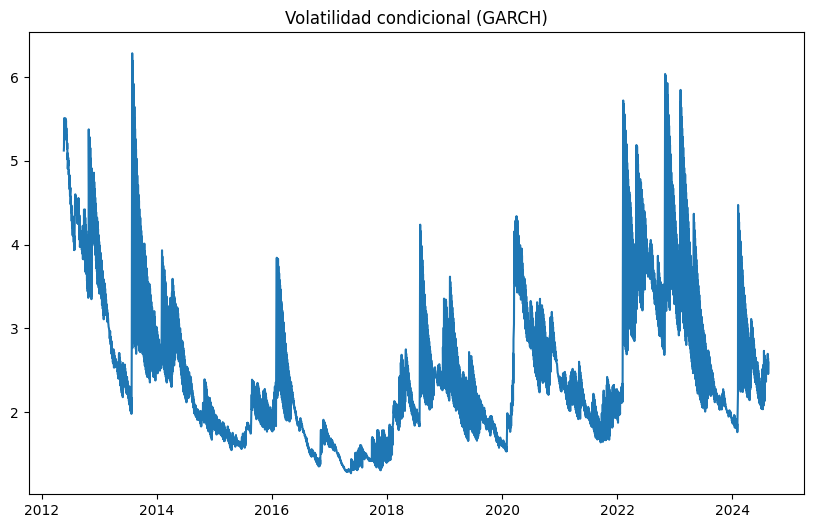

In [83]:
# Plotear volatilidad condicional
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility)
plt.title('Volatilidad condicional (GARCH)')
plt.show()

**Valor en Riesgo**

* 90%: Un riesgo del 10% de que la pérdida supere el VaR.
* 95%: Un riesgo del 5% de que la pérdida supere el VaR.
* 99%: Un riesgo del 1% de que la pérdida supere el VaR

In [84]:
confidence_level = 0.90  # Nivel de confianza del 95%
horizon = 10  # Horizonte temporal de 10 día
investment = 10000  # Inversión inicial de $10,000
# Pronóstico de la volatilidad con GARCH
garch_forecast = garch_fit.forecast(horizon=horizon)
garch_volatility = np.sqrt(garch_forecast.variance.values[-1, :])

# Pronóstico de la volatilidad con ARCH
arch_forecast = arch_fit.forecast(horizon=horizon)
arch_volatility = np.sqrt(arch_forecast.variance.values[-1, :])

In [85]:
# Obtener el z-score para el nivel de confianza
z_score = norm.ppf(confidence_level)

# Calcular el VaR para GARCH
var_garch = investment * (z_score * garch_volatility)

# Calcular el VaR para ARCH
var_arch = investment * (z_score * arch_volatility)

print(f"VaR con GARCH: ${var_garch[0]:.2f}")
print(f"VaR con ARCH: ${var_arch[0]:.2f}")


VaR con GARCH: $31251.97
VaR con ARCH: $31793.85
